## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import csv

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv" #contains mouse id (alphanumeric), drug regimen, sex, age in months, and weight in grams
study_results_path = "data/Study_results.csv" #contains mouse id, timepoint, tumor vol (mm3),  number of metestatic_sites 

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata, study_results, how = 'left', on = ['Mouse ID'])
# Display the data table for preview
combined_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].count()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_time_and_mouse = combined_study_data[combined_study_data.duplicated(['Timepoint', 'Mouse ID'], keep=False)]
duplicate_time_and_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_time_and_mouse_df = pd.DataFrame(duplicate_time_and_mouse, columns = ['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'])
duplicate_time_and_mouse_df.to_csv("duplicate.csv", index = False, header = True)
duplicate_time_and_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_study_data = combined_study_data.drop_duplicates(subset= ['Timepoint', 'Mouse ID'], keep=False)
clean_combined_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(pd.unique(clean_combined_study_data['Mouse ID']))
mice_count

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#group the data set by drug regime
drug_regime_group = clean_combined_study_data.groupby('Drug Regimen')

#calculate mean
groupby_mean = drug_regime_group['Tumor Volume (mm3)'].mean()

#calculate median
groupby_median = drug_regime_group['Tumor Volume (mm3)'].median()

#calculate variance
groupby_var = drug_regime_group['Tumor Volume (mm3)'].var()

#calculate standard deviation
groupby_stddev = drug_regime_group['Tumor Volume (mm3)'].std()

#calculate SEM
groupby_sem = drug_regime_group['Tumor Volume (mm3)'].sem()


#combine summary stats into a single table 

groupby_summary_stats_df = pd.DataFrame({'Mean': groupby_mean, 'Median': groupby_median, 
                                         'Variance': groupby_var, 'Standard Deviation': groupby_stddev, 
                                         'SEM': groupby_sem})


groupby_summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_summary_stats_df = drug_regime_group.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})                 
                                                     

agg_summary_stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
clean_combined_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurement_count_drug_regimen = clean_combined_study_data['Drug Regimen'].value_counts()

measurement_count_drug_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     151
Name: Drug Regimen, dtype: int64

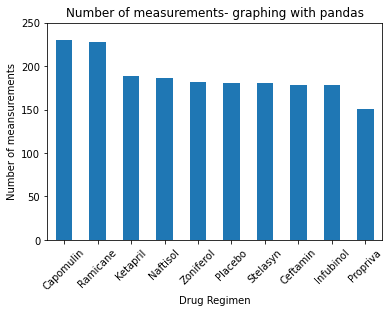

In [13]:
measurement_count_drug_regimen.plot(kind='bar')
plt.title("Number of measurements- graphing with pandas")
plt.ylabel('Number of meansurements')
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 45)
plt.ylim(0, 250)
plt.show()

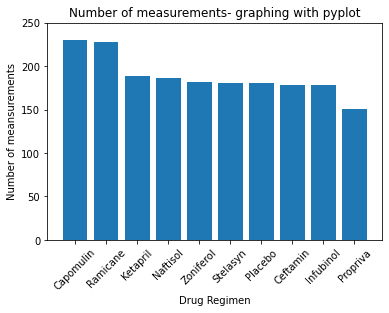

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn',
               'Placebo', 'Ceftamin', 'Infubinol', 'Propriva']
x_axis = np.arange(len(measurement_count_drug_regimen))
plt.bar(x_axis, measurement_count_drug_regimen)
plt.title("Number of measurements- graphing with pyplot")
plt.ylabel('Number of meansurements')
tick_locations = [value for value in x_axis]
plt.xlabel('Drug Regimen')
plt.xticks(tick_locations, drug_regimen, rotation = 45)
plt.ylim(0, 250)
plt.show()


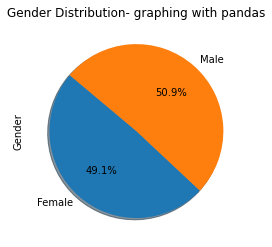

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie_pandas = clean_combined_study_data.groupby(['Sex']).size().plot(kind = 'pie', autopct='%1.1f%%', shadow = True, 
                    startangle= 140, title = ("Gender Distribution- graphing with pandas"))
gender_pie_pandas.set_ylabel('Gender')
plt.show()

In [16]:
#group by gender
gender_distribution = clean_combined_study_data.groupby(['Sex'])
gender_distribution.count()

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,925,925,925,925,925,925,925
Male,958,958,958,958,958,958,958


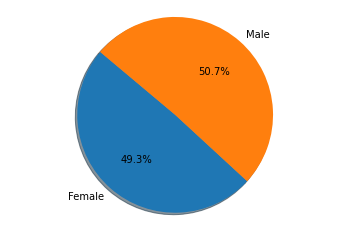

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [930, 958]


plt.pie(sizes, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
id_group = clean_combined_study_data.groupby(['Mouse ID'])['Timepoint'].max()
id_group= id_group.reset_index()

merged_data = id_group.merge(clean_combined_study_data, on= ['Mouse ID', 'Timepoint'], how='left')

merged_data.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [19]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Ceftamin', 'Infubinol']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for x in treatments:
    

    size = merged_data.loc[merged_data['Drug Regimen']==x, 'Tumor Volume (mm3)']
    tumor_vol.append(size)

    quartiles = size.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]

    iqr = round(upperq-lowerq,2)

    #find the lower and upper bounds 
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    outlier_df = size.loc[(size<lower_bound) | 
                                 (size> upper_bound)]

    print(f" For {x} the IQR is {iqr}, tumor volumes greater than {upper_bound} or less than {lower_bound} are potential outliers. Potential outlier for {x} are {outlier_df}")   
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

 For Capomulin the IQR is 7.78, tumor volumes greater than 51.83 or less than 20.71 are potential outliers. Potential outlier for Capomulin are Series([], Name: Tumor Volume (mm3), dtype: float64)
 For Ramicane the IQR is 9.1, tumor volumes greater than 54.31 or less than 17.91 are potential outliers. Potential outlier for Ramicane are Series([], Name: Tumor Volume (mm3), dtype: float64)
 For Ceftamin the IQR is 15.58, tumor volumes greater than 87.67 or less than 25.35 are potential outliers. Potential outlier for Ceftamin are Series([], Name: Tumor Volume (mm3), dtype: float64)
 For Infubinol the IQR is 11.48, tumor volumes greater than 82.75 or less than 36.83 are potential outliers. Potential outlier for Infubinol are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


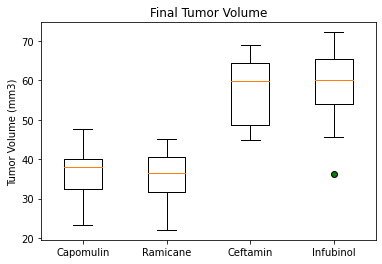

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
flierprops = dict(markerfacecoloe = 'g')
ax1.boxplot(tumor_vol, labels=treatments, flierprops = dict(markerfacecolor = 'g'))
plt.show()



## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume Over Time treated with Capomul')

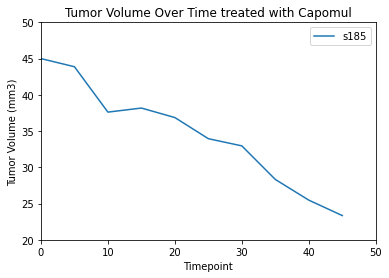

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#mouse id

capomul_mouse_id = 's185'

#gather time points and measurements for mouse

single_mouse = clean_combined_study_data.loc[clean_combined_study_data['Mouse ID']== capomul_mouse_id]

single_mouse

#create line graph for single mouse 

x_axis = single_mouse['Timepoint']
y_axis = single_mouse['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis, label= capomul_mouse_id)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,50)
plt.ylim(20,50)
plt.legend(loc='best')
plt.title('Tumor Volume Over Time treated with Capomul' )

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_tumor_vol = clean_combined_study_data.groupby(['Mouse ID', 'Drug Regimen', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()
                          
campulin = avg_tumor_vol.loc[avg_tumor_vol['Drug Regimen']=='Capomulin']
campulin= campulin.rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume (mm3)'})

campulin.head()


,Mouse ID,Drug Regimen,Weight (g),Avg Tumor Volume (mm3)
19,b128,Capomulin,22,41.963636
24,b742,Capomulin,21,40.083699
61,f966,Capomulin,17,36.505973
64,g288,Capomulin,19,41.990097
66,g316,Capomulin,22,44.613344


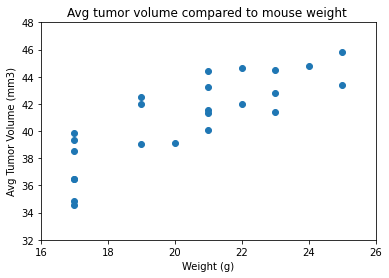

In [26]:
plt.scatter(campulin['Weight (g)'], campulin['Avg Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.title( 'Avg tumor volume compared to mouse weight ')
plt.xlim(16, 26)
plt.ylim(32, 48)
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = campulin['Weight (g)']
vol = campulin['Avg Tumor Volume (mm3)']


print(f"The correlation coefficient between malic acid and flavanoids is {round(st.pearsonr(weight,vol)[0],2)}")


The correlation coefficient between malic acid and flavanoids is 0.84


The equation for the regression line = y = 0.95x + 21.55
The r-squared is: 0.7088568047708717


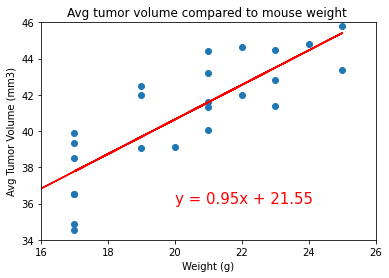

In [31]:
x_values = campulin['Weight (g)']
y_values = campulin['Avg Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line= 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print('The equation for the regression line = ' + line)

plt.plot(x_values, regress_values, "r-")
plt.scatter(campulin['Weight (g)'], campulin['Avg Tumor Volume (mm3)'])
plt.annotate(line, (20,36), fontsize=15, color="r")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.title('Avg tumor volume compared to mouse weight ')
plt.xlim(16, 26)
plt.ylim(34, 46)
print(f"The r-squared is: {rvalue**2}")
plt.show()

